# Assessment Problems

***
***

## Problem 1: Extending the Lady Tasting Tea

---

### Research and Development

---

#### Research Context

The [*Lady Tasting Tea*](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment, introduced by Sir Ronald A. Fisher in 1935, is a classic example of **design of experiments** and **hypothesis testing**.
A lady claimed she could distinguish whether milk was poured into a cup before or after the tea was added.

The original experiment used eight cups: four milk-first ('M') and four tea-first ('T').
The probability of perfectly identifying the milk-first cups by chance was very low (~0.0143).

Extending the experiment to twelve cups, with four milk-first and eight tea-first, allows us to **estimate the likelihood of success by chance in a larger experiment**.

---

#### Development Considerations

* **Representation:** Using 'M' and 'T' provides a clear and simple way to distinguish between milk-first and tea-first cups.  
* **Randomisation:** Each trial is independent, reflecting the null hypothesis.  
* **Simulation scale:** The experiment uses simple loop-based logic to maintain clarity and transparency in the implementation. 
* **Statistical insight:** Demonstrates probability estimation with explicit loops.  

***

#### Hypotheses

**Null Hypothesis (H₀):**  
The lady cannot distinguish between milk-first and tea-first cups beyond random chance.  

**Alternative Hypothesis (H₁):**  
The lady can distinguish milk-first from tea-first cups with accuracy greater than chance.

---

### Experiment Setup

---

The process begins with the import of NumPy, which provides the foundation for randomisation and numerical computations throughout the experiment.

In [9]:
import numpy as np


Before running the experiment, a fixed random seed is set so that NumPy gives the same random choices every time. This makes the results easier to verify later and helps maintain consistency if someone else wants to repeat the same test.

[The Curious Case of 42: Why Python Loves This Number for Randomization](https://medium.com/ai-simplified-in-plain-english/python-random-seed-42-125a3f2e068f) articule on the Medium website gives interesting explain of why the number 42 is often used by programmers.

In [10]:
# Set random seed for reproducibility
np.random.seed(42)


The experiment defines the total number of cups, specifying how many are milk-first and how many are tea-first.

In [12]:
# Total number of cups in the experiment
total_cups = 12  

# Number of cups where milk was poured first
cups_milk_first = 4  

# Number of cups where tea was poured first
cups_tea_first = 8  


The theoretical probability of correctly identifying all milk-first cups will be calculated using combinatorics.
The total number of unique combinations of milk-first cups is computed, and the probability of a perfect guess is derived.

To find out how many ways the milk-first cups can be chosen from all cups, `numpy.arange` and `numpy.prod` are used.  
`np.arange` creates a sequence of numbers corresponding to the numerator of the combination formula, and `np.prod` multiplies them together to get the total product.  
This calculation gives the number of possible selections of milk-first cups **before considering the order** in which they appear.  
For more details, see the [NumPy documentation on prod](https://numpy.org/doc/stable/reference/generated/numpy.prod.html) and [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [22]:
# Combinatorial calculation of the probability of correctly guessing all milk-first cups

# Number of ways to choose cups_milk_first cups from total_cups
ways_to_choose = np.prod(np.arange(total_cups, total_cups - cups_milk_first, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk = np.prod(np.arange(cups_milk_first, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations = ways_to_choose // ways_to_order_milk

# Theoretical probability of correctly guessing all milk-first cups
probability_theoretical = 1 / total_combinations

print(f"Theoretical probability of perfect guess: {probability_theoretical:.8f}")


Theoretical probability of perfect guess: 0.00202020


The theoretical probability provides a mathematical baseline for comparison.

Create the initial arrangement of cups before any shuffling takes place.
To understand how to use `numpy.array`, please visit the official documentation: [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

This array represents the true configuration of the experiment, where each cup is labelled as either milk-first ('M') or tea-first ('T'). 

In [ ]:
# Define the true order of cups: 'M' for milk-first, 'T' for tea-first
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Display the initial arrangement of cups
print("Initial cup setup:", true_labels)


Initial cup setup: ['M' 'M' 'M' 'M' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']


With the theoretical framework established, the next stage focuses on hypothesis verification.  
A Monte Carlo approach, a computational method that uses repeated random sampling to estimate probabilities, is applied to shuffle the cup arrangement many times and record outcomes where the participant correctly identifies all milk-first cups.  
By comparing the proportion of perfect guesses obtained from these simulated trials with the theoretical probability, the validity of the null hypothesis can be examined empirically.  
For more information, visit the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) page on Wikipedia.


To shuffle the cups in each trial, `numpy.random.permutation` is used.  
It creates a new array with the elements in random order, leaving the original array unchanged, which is useful for running multiple simulations.  
See the [NumPy documentation on random.permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) for more details.

To model the participant picking cups at random, `numpy.random.choice` is used.  
This lets you select a given number of elements from an array **without replacement**, so the same cup isn’t picked twice in the same trial.  
More information can be found in the [NumPy documentation on random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).

To check whether all chosen cups are milk-first, `numpy.all` is applied.  
It returns `True` only if **every element in a boolean array is True**, which is perfect for determining whether a perfect guess occurred in a trial.  
For details, see the [NumPy documentation on all](https://numpy.org/doc/stable/reference/generated/numpy.all.html).


In [ ]:
# Number of simulation trials to estimate the probability of a perfect guess
n_trials = 1_000_000

# Counter for the number of perfect guesses observed
successes = 0

# Simulation to estimate the probability of a perfect guess
for _ in range(n_trials):
    # Randomize the cup arrangement each trial
    randomized_labels = np.random.permutation(true_labels)
    
    # Lady randomly picks 4 cups
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    
    # Check if all guessed cups are milk-first
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes+= 1

# Calculate the probability of a perfect guess
p_value = successes/ n_trials
p_value

### Comparison with the Original 8-Cup Experiment

Now that the extended 12-cup experiment has been simulated, the next step is to repeat the same calculation for the original Lady Tasting Tea design (8 cups: 4 milk-first and 4 tea-first).  
This will allow a direct comparison of the probability of a perfect guess by chance between the two setups.

In [ ]:
# Theoretical probability for the original 8-cup experiment (4 milk-first, 4 tea-first)

total_cups_original = 8
cups_milk_first_original = 4

# Number of ways to choose cups_milk_first_original cups from total_cups_original
ways_to_choose_original = np.prod(np.arange(total_cups_original, total_cups_original - cups_milk_first_original, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk_original = np.prod(np.arange(cups_milk_first_original, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations_original = ways_to_choose_original // ways_to_order_milk_original

# Theoretical probability
probability_theoretical_original = 1 / total_combinations_original

print(f"Theoretical probability (8-cup experiment): {probability_theoretical_original:.8f}")


In [ ]:
# Monte Carlo simulation for the 8-cup (original) experiment

total_cups = 8
cups_milk_first = 4
cups_tea_first = 4
n_trials = 1_000_000

# True labels
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Counter for perfect guesses
successes = 0

# Simulation
for _ in range(n_trials):
    randomized_labels = np.random.permutation(true_labels)
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes += 1

# Empirical probability
p_value_original = successes / n_trials
print(f"Simulated probability (8-cup experiment): {p_value_original:.8f}")


### Conclusion

In [ ]:
print("Comparison of theoretical and simulated probabilities:\n")

print(f"Original 8-cup experiment (4M/4T):")
print(f"  Theoretical probability: {probability_theoretical_original:.8f}")
print(f"  Simulated probability:   {p_value_original:.8f}\n")

print(f"Extended 12-cup experiment (4M/8T):")
print(f"  Theoretical probability: {probability_theoretical:.8f}")
print(f"  Simulated probability:   {p_value:.8f}\n")

print("Interpretation & Conclusion:")
print(f"- For the original 8-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical_original:.8f} and the simulated probability is {p_value_original:.8f}.")
print(f"- For the extended 12-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical:.8f} and the simulated probability is {p_value:.8f}.")
print("- The probability of a perfect guess decreases in the 12-cup version, making random success even less likely.")
print("- Using the conventional p-value threshold of 0.05 (not derived from this simulation),\n"
      "  a perfect guess in the 12-cup experiment would be highly unlikely under the null hypothesis.")
print("- Therefore, the standard p-value threshold remains appropriate, and the extended design naturally strengthens the test.")
print("Source: Groenland et al., 2019. Using History to Contextualise p-Values and Significance Testing. "
      "PMC Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6693672/")


***

## Problem 2: Normal Distribution

***

### Theoretical Overview: Sample vs. Population Standard Deviation

***

#### 1. What is Standard Deviation?

**Standard deviation (SD)** measures how much the values in a dataset deviate from the mean.  
- A **low SD** means values are close to the mean.  
- A **high SD** means values are more spread out.  
Population SD is denoted by **σ**, and sample SD by **s**.  
For more information, visit the [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) page on Wikipedia.


#### 2. Population vs. Sample Standard Deviation

- **Population SD (σ):** Used when you have **all the data**. Divides by **N**.  
Learn more on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

- **Sample SD (s):** Used when you have a **subset of data**. Divides by **n − 1** (Bessel’s correction).  
You can read about this on the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) page on Wikipedia.


#### 3. Why the Difference?

Dividing by **n − 1** corrects for bias introduced by estimating the population mean from the sample mean.  
For further details, see the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) article.


#### 4. In Practice

- Use **Population SD (`ddof=0`)** if you have **all data**.  
- Use **Sample SD (`ddof=1`)** if you only have a **sample**.  
For guidance, visit the [Pandas `std()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) page.


#### 5. Software Defaults

- **NumPy:** `ddof=0` - population SD  
- **Pandas:** `ddof=1` - sample SD  
More information is available on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

***

### Research and Development: Effect of Sample Size on SD Estimation

***

**Purpose:**  

- Understand why sample SD (`ddof=1`) and population SD (`ddof=0`) differ.  
- Explore conceptually how differences in SD estimates decrease as sample size increases.  
- This section sets the context for the computations that follow.

***

### Step 1: Import Libraries

We will use:

- `numpy` for generating random samples and computing standard deviations.
- `matplotlib.pyplot` for plotting histograms.


In [36]:
# Import NumPy for numerical computations
import numpy as np
# Import Matplotlib for plotting
import matplotlib.pyplot as plt


#### Step 2: Generate 100,000 Samples of Size 10

Each row represents a single sample of size 10 drawn from a standard normal distribution.


To generate random samples from the standard normal distribution, we use [`numpy.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html).  
It creates an array of normally distributed random numbers with mean 0 and standard deviation 1.  
Each row in the resulting array represents one sample of data.


In [37]:
# Number of samples and size of each sample
num_samples = 100_000
sample_size = 10

# Generate samples from the standard normal distribution
samples = np.random.randn(num_samples, sample_size)


#### Step 3: Computing Sample and Population Standard Deviations

To understand how much each sample varied, the standard deviation was calculated using [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html), along `axis=1`.

##### Why `axis=1`?

Each row of the dataset represents a sample, and each column contains repeated measurements.  
Using `axis=1` measures the spread **within each sample**.  
If `axis=0` were used instead, it would measure the spread **across samples for each measurement**.  

For a clear explanation of axes in NumPy, see [Understanding Axes in NumPy](https://medium.com/@weidagang/understanding-axes-in-numpy-8c889794e541).

##### Sample vs Population Standard Deviation

The `ddof` parameter determines whether the calculation treats the data as a sample or a population:  

- `ddof=1` – Sample SD (unbiased estimate, divides by `n−1`)  
- `ddof=0` – Population SD (divides by `n`, may slightly underestimate small samples)

Full details can be found in the [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html).  

Setting these parameters correctly ensures the results reflect the true variability within each sample.


In [38]:
# Compute sample standard deviation (unbiased, ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)
# Compute population standard deviation (biased, ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)


#### Step 4: Plotting Histograms of Sample and Population Standard Deviations


Computing Mean Standard Deviations

To better interpret the histograms of standard deviations, we compute the **mean SD** for each method:

- **Sample SD (`ddof=1`)**: gives an unbiased estimate of the population standard deviation.  
- **Population SD (`ddof=0`)**: tends to underestimate the true standard deviation for small samples.

By calculating the mean, we can clearly see which method is closer to the true SD (σ = 1) and compare the bias of the estimators.

In [39]:
# Compute the mean standard deviation using the sample (unbiased) method
mean_sample_sd = np.mean(sample_sd)

# Compute the mean standard deviation using the population (biased) method
mean_population_sd = np.mean(population_sd)


To compare the variability of samples, histograms of the **sample SD** (`ddof=1`) and **population SD** (`ddof=0`) were plotted on the same axes.

##### Why plot histograms?

Histograms provide a **visual representation of the distribution** of data.  
By plotting both sample and population SDs:

- It is easy to see **how often each standard deviation occurs**.
- Differences between the sample and population estimates become clear.
- Patterns, trends, or anomalies in the data can be quickly identified.

Using transparency (`alpha=0.5`) allows both distributions to be compared on the same plot without hiding either.  
Normalizing the histograms (`density=True`) ensures they are on the **same scale**, so comparison is easier even if the number of bins or samples differs.

##### How it is done in Python?

The plot was created using [Matplotlib](https://matplotlib.org/stable/contents.html), the standard Python library for visualizing data.  
Key features used:

- `plt.hist()` to create histograms  
- `bins` to control the resolution  
- `alpha` to adjust transparency  
- `density=True` to normalise  
- `plt.xlabel()`, `plt.ylabel()`, `plt.title()` for labels and title  
- `plt.legend()` for a clear legend  
- `plt.grid()` for readability
- `plt.show()` to show result  

For more details, visit the [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) page.

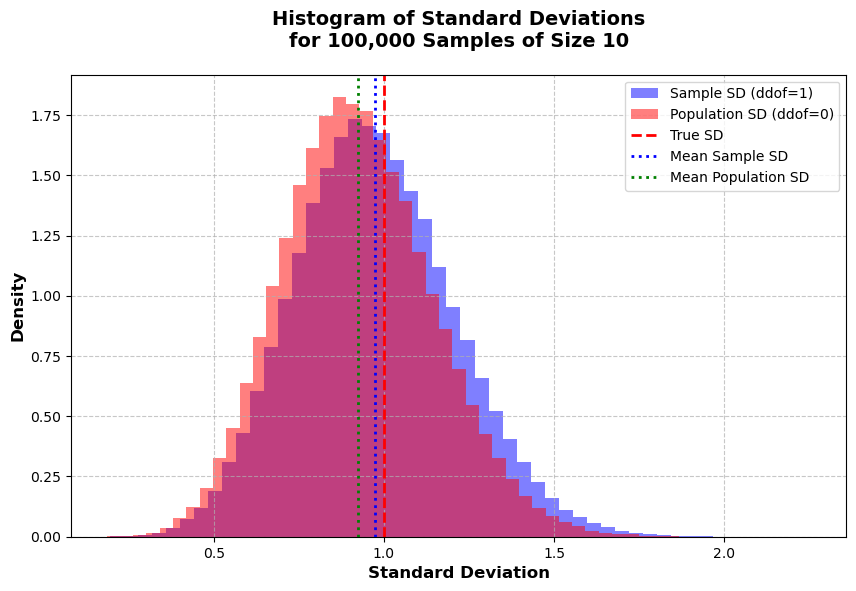

Average Sample SD (ddof=1): 0.9733468034463095
Average Population SD (ddof=0): 0.9233978556403702


In [40]:
# # Plot histograms of sample and population standard deviations
plt.figure(figsize=(10,6))

# Plot histograms with transparency and normalisation
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='red', density=True)

# Vertical lines: true SD and mean SDs
plt.axvline(1, color='red', linestyle='dashed', linewidth=2, label='True SD')
plt.axvline(mean_sample_sd, color='blue', linestyle='dotted', linewidth=2, label='Mean Sample SD')
plt.axvline(mean_population_sd, color='green', linestyle='dotted', linewidth=2, label='Mean Population SD')


# Labels and title
plt.xlabel('Standard Deviation', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title(
    'Histogram of Standard Deviations\nfor 100,000 Samples of Size 10',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Add legend
plt.legend()

# Add a grid for better readability
plt.grid(alpha=0.7, linestyle='--')

# Display the plot
plt.show()

# Present the mean standard deviations
print("Average Sample SD (ddof=1):", mean_sample_sd)
print("Average Population SD (ddof=0):", mean_population_sd)

